> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

<h3>When new films are released, the various factors that attract viewers are taken into account, and they choose the film and be successful. From these factors, questions must be asked to obtain the answers to get the best result before the films are released.</h3>


### Question(s) for Analysis
--Which actors with the most popular in films ?<br>
-- which Movies had most and least profit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import seaborn as sns



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01  4% |█▍                              | 450kB 23.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01  2% |▉                               | 358kB 26.5MB/s eta 0:00:01    22% |███████                         | 3.0MB 26.6MB/s eta 0:00:01    32% |██████████▎                     | 4.3MB 26.0MB/s eta 0:00:01    91% |█████████████████████████████▏  | 12.2MB 26.7MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
print(df.head())


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [4]:
df.info()
print(50*'_')
print(f'Dataframe contains {df.shape[0]} rows and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

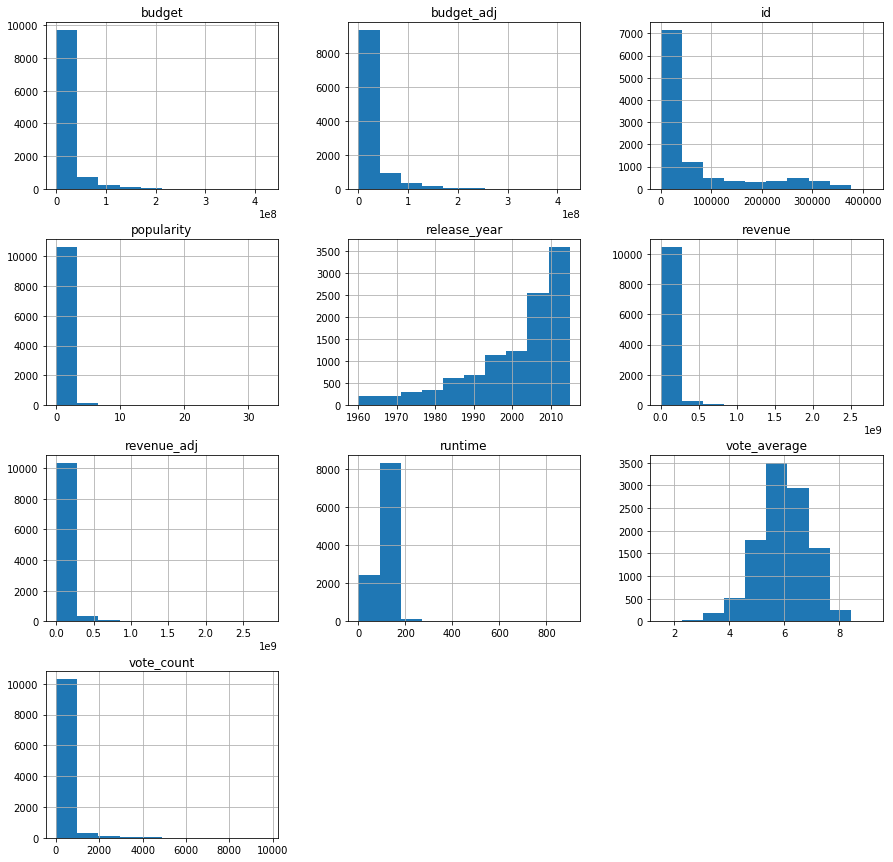

In [5]:
df.hist(figsize=(15,15));
#Adding the semicolon to hide hist discrebtion

In [6]:
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

<h1> After Looking the Dataset For The First Time :</h1>
<p>There are a lot of columns that indicate a problem. Many rows seem to have multiple values separated by '|'. 
It should be cleaned up in the first place in order to provide a suitable data set for the intended analysis.</p>


<h2> Dealing With NAN Value and Zero(0)</h2>
<p>
    df.info( ) revealed that most columns with important content for the analysis, such us revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" will change its "0" values into "nan" and the respective colums will be dropped for the analysis.
    </p>


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)


In [8]:
#Seperating columns with several values, split by an '|', into as many columns as needed
df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_dir = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_key = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_gener = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_prod = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking if split
print(df_cast.head())
print(df_dir.head())
print(df_key.head())
print(df_gener.head())
print(df_prod.head())

             cast_1               cast_2            cast_3  \
0       Chris Pratt  Bryce Dallas Howard       Irrfan Khan   
1         Tom Hardy      Charlize Theron  Hugh Keays-Byrne   
2  Shailene Woodley           Theo James      Kate Winslet   
3     Harrison Ford          Mark Hamill     Carrie Fisher   
4        Vin Diesel          Paul Walker     Jason Statham   

               cast_4          cast_5  
0   Vincent D'Onofrio   Nick Robinson  
1      Nicholas Hoult     Josh Helman  
2        Ansel Elgort    Miles Teller  
3         Adam Driver    Daisy Ridley  
4  Michelle Rodriguez  Dwayne Johnson  
         director_1 director_2 director_3 director_4 director_5 director_6
0   Colin Trevorrow       None       None       None       None       None
1     George Miller       None       None       None       None       None
2  Robert Schwentke       None       None       None       None       None
3       J.J. Abrams       None       None       None       None       None
4         Ja

In [9]:
df.drop_duplicates(keep ='first', inplace=True)

In [10]:
#check duplication
df.duplicated().sum()

0

In [11]:
print(df.head(4))


       id    imdb_id  popularity       budget       revenue  \
0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2    

In [12]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
print(df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 ( which actors with the most popular in films)

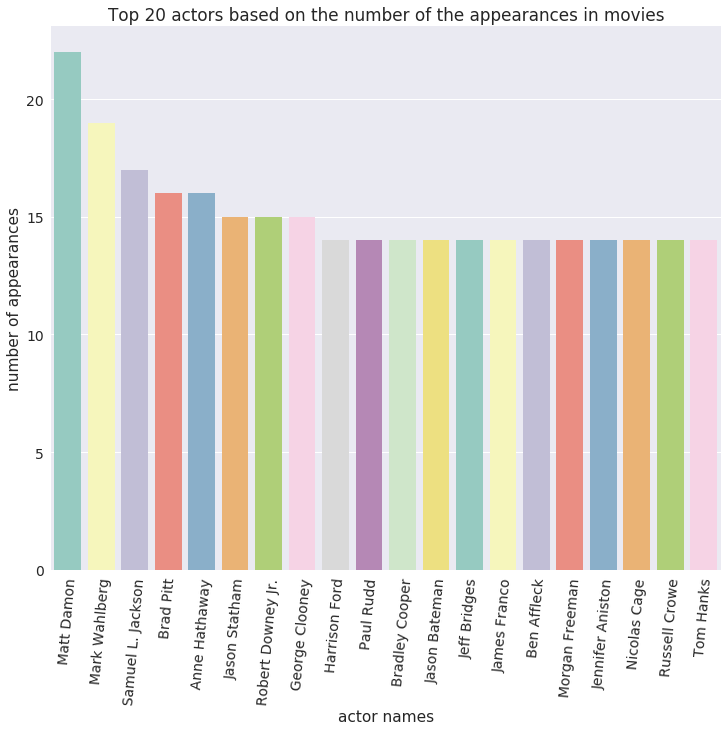

In [13]:
actor_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

It is clear from the figure above that the top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.

### Research Question 2  (Whice Movies had most and least Revenue!)

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def calculate(column):
    #for highest earned revenue
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    print(info)
    
    


calculate('revenue_adj')
    


                                                                   1386  \
id                                                                19995   
imdb_id                                                       tt0499549   
popularity                                                      9.43277   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
homepage                                    http://www.avatarmovie.com/   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
keywords              culture clash|future|space war|space colony|so...   
overview              In the 22nd century, a paraplegic Marine is di...   
runtime                  

In [15]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

                                                                   2244  \
id                                                                46528   
imdb_id                                                       tt1032751   
popularity                                                      0.25054   
budget                                                        425000000   
revenue                                                        11087569   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
homepage                         http://www.iamrogue.com/thewarriorsway   
director                                                     Sngmoo Lee   
tagline                                         Assassin. Hero. Legend.   
keywords              assassin|small town|revenge|deception|super speed   
overview              An Asian assassin (Dong-gun Jang) is forced to...   
runtime                  

In [17]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

                                                                   4949  \
id                                                                  122   
imdb_id                                                       tt0167260   
popularity                                                      7.12246   
budget                                                         94000000   
revenue                                                      1118888979   
original_title            The Lord of the Rings: The Return of the King   
cast                  Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
homepage                                  http://www.lordoftherings.net   
director                                                  Peter Jackson   
tagline                                 The eye of the enemy is moving.   
keywords              elves|orcs|middle-earth (tolkien)|based on nov...   
overview              Aragorn is revealed as the heir to the ancient...   
runtime                  

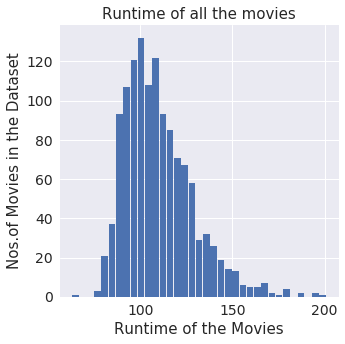

In [20]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(5,5))

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between
100 to 130 minutes. Almost 1000 and more no.of movies fall in this criteria.

<a id='conclusions'></a>
## Conclusions
<h3>The first research question '--Which actors with the most popular in films ?'
it show the most popular actors are:
1-Matt Dammon
2-Mark Wahleberg
3-SamuelJackson
so if we u are a director i recomended choose one of them to your next film<br>
The second research question 'Whice Movies had most and least Revenue! ?'
 shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.</h3>



### Limitations
<p>This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.</p>

## Submitting your Project 



In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0